In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

# Load and preprocess data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

# Xavier initialization
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(1. / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(1. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def create_mini_batches(X, Y, batch_size):
    m = X.shape[1]
    permutation = list(np.random.permutation(m))
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[permutation]

    mini_batches = []
    num_complete_minibatches = m // batch_size
    for k in range(num_complete_minibatches):
        mini_batch_X = X_shuffled[:, k * batch_size:(k + 1) * batch_size]
        mini_batch_Y = Y_shuffled[k * batch_size:(k + 1) * batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    
    if m % batch_size != 0:
        mini_batch_X = X_shuffled[:, num_complete_minibatches * batch_size:]
        mini_batch_Y = Y_shuffled[num_complete_minibatches * batch_size:]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    
    return mini_batches

def gradient_descent(X, Y, iterations, alpha, batch_size):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        mini_batches = create_mini_batches(X, Y, batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, mini_batch_X)
            dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, mini_batch_X, mini_batch_Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy:.4f}")
    return W1, b1, W2, b2

In [2]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [3]:
# Example usage:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations=100, alpha=0.1, batch_size=32)

Iteration: 0, Accuracy: 0.8162
Iteration: 10, Accuracy: 0.9326
Iteration: 20, Accuracy: 0.9368
Iteration: 30, Accuracy: 0.9479
Iteration: 40, Accuracy: 0.9460
Iteration: 50, Accuracy: 0.9219
Iteration: 60, Accuracy: 0.9539
Iteration: 70, Accuracy: 0.9530
Iteration: 80, Accuracy: 0.9572
Iteration: 90, Accuracy: 0.9564


Prediction:  [2]
Label:  2


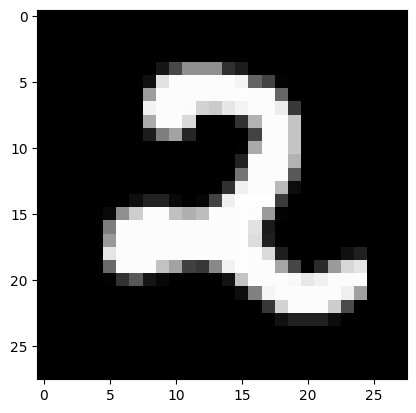

Prediction:  [6]
Label:  6


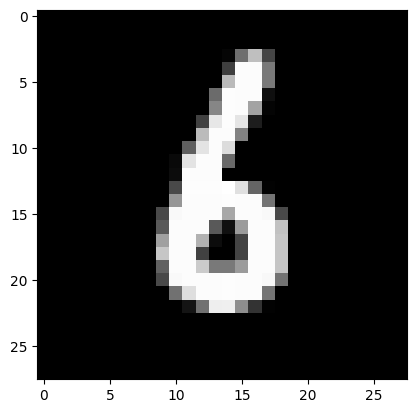

Prediction:  [1]
Label:  1


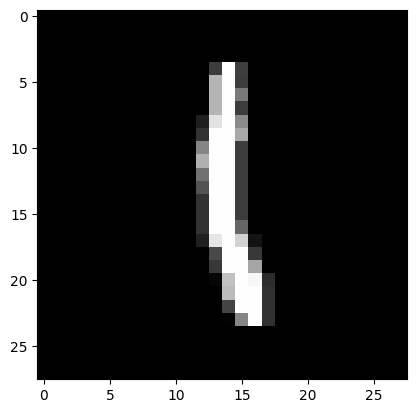

Prediction:  [8]
Label:  8


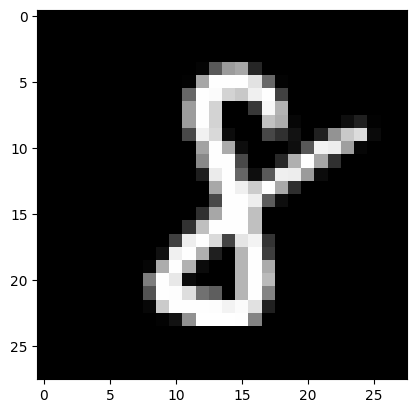

Prediction:  [3]
Label:  3


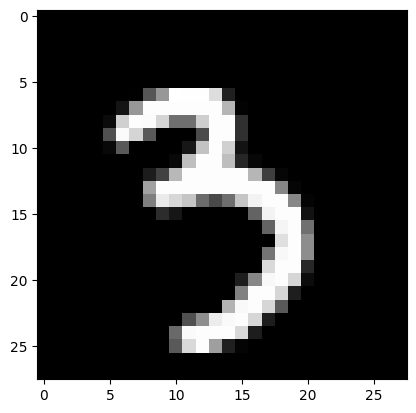

Prediction:  [0]
Label:  0


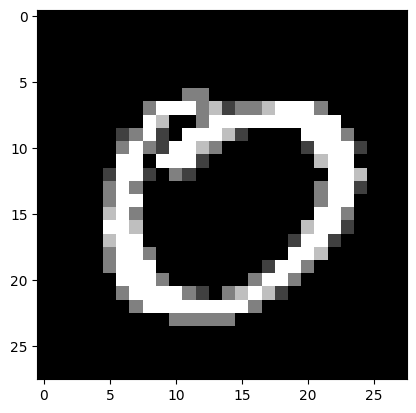

Prediction:  [7]
Label:  7


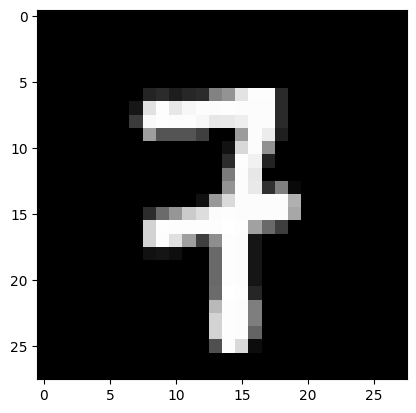

In [4]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)

In [5]:
data_dev.shape

(785, 1000)

In [6]:
data_train.shape

(785, 41000)